## Neural Network from Scratch

### Let's try to build a neural network from scratch!!
This exercise will help you understand how neural network works.


#### For this we will be implementing the following steps:
##### 1.Initialise the parameters(weights and biases)
##### 2.Define forward propogation
##### 3.Define backward propagation
##### 4.Define fit function
##### 5.Define predict function

In [166]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [181]:
"""
Generating the data to train and test the model.since we are building a simple neural network, I decided to go with a simple 
data.If you look closely this is the full adder input which build using logic gates and the output is the sum of the full adder
circuit.
"""
X = np.array([[0,1,0],
                      [0,0,1],
                      [1,0,0],
                      [1,1,0],
                      [1,1,1],
                      [0,1,1],
                      [0,1,0]])
y = np.array([[1,
                    0,
                    0,
                    1,
                    1,
                    0,
                    1]])
y = labels.reshape(7,1) #to convert labels to vector

### 1. Initialise weights

For any neural network to learn and improve the two most important parameters required are:Weights and bias.These parameters are
then changed by the network according to the data with the aim of reducing the loss/cost function so that model has good acccuracy and performance.
For the initial step the weights are initialised randomly rather than intialising them as 0.
Initialisation of the weights and bias depends on the layer of your network usually the size of the weights(W1) for the first layer in the network in (the no. of columns/features in the training set,the number of neurons in the next hidden layer) in this case since the training data has 3 columns the size will be (3,2).It is not compulsory for you to chose 2 as the number of neurons in 
the hidden layer it can be any number.

Size of the bias(b1) in the first layer will be (the number of neurons in the next layer,)

Size of the weight(W2) in the second/hidden layer will be (the number of neurons in the next layer,the number of neurons/classes in the output layer)

If you are solving a binary-classification problem like this example then usually your output layer will have one neuron that can hold value 1 or zero.The number of neurons in the last layer changes according to the problem.

Size of the bias(b2) of the second layer: (the number of neurons/classes in the output layer,)

After intialising we will store these weights and bias in a dictionary that can be used later.


In [182]:
def init_weights(layers=[]):
        params={}
        np.random.seed(1) # Seed the random number generator
        params["W1"] = np.random.randn(layers[0], layers[1]) 
        params['b1']  =np.random.randn(layers[1],)
        params['W2'] = np.random.randn(layers[1],layers[2]) 
        params['b2'] = np.random.randn(layers[2],)
        
        return params

In [183]:
params=init_weights(layers=[3,2,1])
params

{'W1': array([[ 1.62434536, -0.61175641],
        [-0.52817175, -1.07296862],
        [ 0.86540763, -2.3015387 ]]),
 'b1': array([ 1.74481176, -0.7612069 ]),
 'W2': array([[ 0.3190391 ],
        [-0.24937038]]),
 'b2': array([1.46210794])}

### 2. Define forward propagation

In order to understand how we can define a forward propagation we have to first understand how a neural network works.Intially the weights and bias are intialised then these parameters are used to calculate a quantity usually refered as Z.
                                     Z= W*X+b
                                     where W= weights,X=input,b=bias
Once the Z is computed then it is passed through an activation functions.
                                   A1=activation(Z)
There are many types of activation functions such as relu,tanh,sigmoid,softmax.Usually relu/tanh are used in the hidden layers where as softmax/sigmoid are used in the last/output layer. This process is repeated till we reach the last layer where the output is calculated.After calculating output a loss function is used to calculate the loss of the model.This loss is then used in backpropagation to change the weights and bias such that the loss function reduces.</h4>

<h3>Here's a gif to help you visualise the working of a neural network:
![nnworking](https://miro.medium.com/max/3000/1*bhFifratH9DjKqMBTeQG5A.gif)


I tried to give a rough overview of how a neural network works.If you want to get a deeper understanding about the network, you can read this article : <i>https://medium.com/@purnasaigudikandula/a-beginner-intro-to-neural-networks-543267bda3c8 </i>

In [184]:
def relu(Z):
        '''
        The ReLufunction performs a threshold
        operation to each input element where values less 
        than zero are set to zero.
        '''
        return np.maximum(0, Z)
        
        
def sigmoid(Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1.0 / (1.0 + np.exp(-Z))
    



Since loss function plays an important role in imporving the accuracy of the model it is important to choose the correct type of loss function that can be used to esitmate the performance of the model.For classification problem we usually use cross_entropy as our loss function where as for regression problems we use mean square error or other regression losses.

Formula of cross_entropy: 
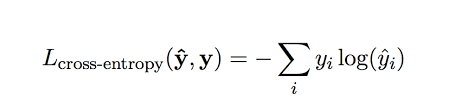


This formula is implemented in the entropy_loss function that takes actual output and predicted output as inputs and calculates the loss.

In [185]:
def entropy_loss(y, yhat):
        nsample = len(y)
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((1 - y), np.log(1 - yhat))))
        return loss

Forward propagation will take in inputs(X,y) and then return the predicted output and loss

In [186]:
def forward_propagation(X,y):
        '''
        Performs the forward propagation
        '''
        
        Z1 = X.dot(params['W1']) + params['b1']
        A1 = relu(Z1)
        Z2 = A1.dot(params['W2']) + params['b2']
        yhat = sigmoid(Z2)
        loss = entropy_loss(y,yhat)

        # save calculated parameters     
        params['Z1'] = Z1
        params['Z2'] = Z2
        params['A1'] = A1

        return yhat,loss

In [187]:
yhat,loss=forward_propagation(X,y)
loss

1.0990247935590556

#### 3.Define backpropagation
Now we have the loss from the forward propagation.Let's use backpropagation to reduce the loss and imporve the performance.
It is little tricky to understand how back propagation works, in layman terms we start from the output layer change the weights and bias of that layer and then move into the hidden layer change those values wrt to the out layer weights and bias.Repeat this till we reach the input layer.

If you know calculus then the backpropagation is mainly done by computing the derivative of loss wrt weights,bias and activation function.This is done as a derivative will tell how much the loss function changes when we change the weights and bias.In backpropagation the derivative is computed using a rule called chain rule.

Here's an article that you can read to understand how these derivates are calculated: 
<i>https://medium.com/@pdquant/all-the-backpropagation-derivatives-d5275f727f60</i>

#### Visualise backpropagation:


![backpropagation](https://mlfromscratch.com/content/images/2019/12/overview-nn-optimized.gif)


In [188]:
def back_propagation(X,y,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        learning_rate=0.01
        def dRelu(x):
            x[x<=0] = 0
            x[x>0] = 1
            return x
        
        dl_wrt_yhat = -(np.divide(y,yhat) - np.divide((1 - y),(1-yhat)))
        dl_wrt_sig = yhat * (1-yhat)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(params['W2'].T)
        dl_wrt_w2 = params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0)

        dl_wrt_z1 = dl_wrt_A1 * dRelu(params['Z1'])
        dl_wrt_w1 =X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0)

        #update the weights and bias
        params['W1'] = params['W1'] - learning_rate * dl_wrt_w1
        params['W2'] = params['W2'] - learning_rate * dl_wrt_w2
        params['b1'] = params['b1'] - learning_rate * dl_wrt_b1
        params['b2'] =params['b2'] - learning_rate * dl_wrt_b2


#### Define a fit function

Now we are implemented foward and backward propagation seperately.It is time for us to combine them and call them recursively.This is done using a fit function.Fit function usually runs for certain number of time ,this number is usually called epochs.One epoch means passing the entire data one time to model.

For this example I ran the training data for 200 epochs and each time I called the forward_propagation got the predicted value vector and loss value.Passed that value to backpropagation, here the weights and bias are updated in order to reduce the loss function.To monitor how the loss is changing in each epoch I used a list to store the loss value after each iteration.Later I print those loss values to see if the loss is decreasing or increasing after every epoch.

In [203]:
def fit(X, y):
    Loss=[]

    for i in range(100):
        yhat, loss = forward_propagation(X,y)
        back_propagation(X,y,yhat)
        
        Loss.append(loss)
        
       
    return Loss

In [204]:
loss=fit(X,y)
print(loss)


[0.3511467444665201, 0.34994519653375106, 0.3487459637961401, 0.3475490571901554, 0.346354486837742, 0.34516226207581696, 0.3440326043633848, 0.34310081455800356, 0.3421799848081703, 0.3412687025385637, 0.3403657190031814, 0.33946993122712726, 0.33858036581262213, 0.33769616443927136, 0.3368165708998287, 0.3359409195240859, 0.3350686248548307, 0.3341991724508379, 0.333332110702462, 0.332467043555476, 0.3316036240482973, 0.33074154857661114, 0.3298805518076456, 0.32902040217396444, 0.32816089788363606, 0.32730186339004436, 0.3264431462704434, 0.3255846144676733, 0.3247261538542585, 0.3238676660824716, 0.3230090666878634, 0.32215028341730045, 0.32129125475572196, 0.3204319286286862, 0.3195722612603173, 0.31871221616855955, 0.317851763281674, 0.31699087816174404, 0.3161295413225674, 0.3152677376307674, 0.3144054557802367, 0.3135426878311653, 0.31267942880592886, 0.3118156763350075, 0.31095143034690204, 0.31008669279673023, 0.3092214674288056, 0.30835575956905886, 0.3074895759436536, 0.306

#### Visualise loss function

This is a small plot function I wrote to help me visualise the function after every iteration.The X-value denotes the number of iterations/epochs and the y-value denotes the loss at that particular iteration.

In [205]:
def plot(loss):
    plt.plot(loss)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss Visualisation')
    return plt.show()

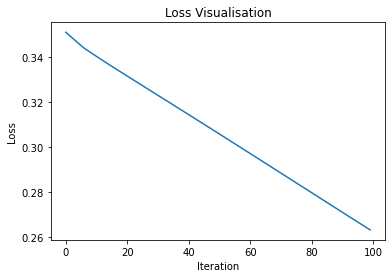

In [206]:
plot(loss)

#### Predict Function

Finally!!
After implementing the fit function and visualising the loss function.Its time to test our model!
We will give a similar input to the model and check if it's giving correct output or not.

The predict function calculates the Z1,a1,Z2 and y_pred values similar to the way it is calculated in the forward_propagation.As we are saving the weights and bias updates in the params dictionary initialised earlier.When we call those values,we are in turn using the updated weights and bias.

To test our model I have passed the input =[0,0,0] which it has never seen before!The correct output of this input is 0.
Let's find out what our model predicts.

In [207]:
def predict(input_value):
    Z1=np.dot(input_value,params["W1"])+params["b1"]
    a1=relu(Z1)
    Z2=np.dot(a1,params["W2"])+params["b2"]
    y_pred=sigmoid(Z2)
    return np.round(y_pred,0)

In [208]:
y_pred=predict([0,0,0])
y_pred

array([0.])

### Yay!We got the correct output.This shows that our model has good performance.This is a very basic implementation of a neural network.A deeper neural network with many layers and parameters can be implemented to solve real world problems.



### I would encourage all of you to implement a similar neural network on your own and train it on your own data and test it's performance.This will help you to get a deeper insight about how a neural network works and how it can be build from scratch without using any pre-build functions from keras or tensorflow!